<h1><b>인공지능개론 12주차 과제</b></h1>
<p>컴퓨터공학과 202136038 조성준</p>


---

<h2><b>1. 데이터 로딩</b></h2>

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

seed = "/content/seeds_dataset.txt"
df =  pd.read_csv(seed, delim_whitespace=True, header=None)

df

<ipython-input-63-39182777a658>:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df =  pd.read_csv(seed, delim_whitespace=True, header=None)


,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [64]:
# 컬렴명 확인
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

In [65]:
#컬럼 이름 붙이기
df.columns = [
    'area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width',
    'asymmetry_coefficient', 'kernel_groove_length', 'class'
]

#반영확인
print(df.columns)

Index(['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width',
       'asymmetry_coefficient', 'kernel_groove_length', 'class'],
      dtype='object')


In [66]:
# 결측치 확인
print(df.isnull().sum())

area                     0
perimeter                0
compactness              0
kernel_length            0
kernel_width             0
asymmetry_coefficient    0
kernel_groove_length     0
class                    0
dtype: int64


**Model 1**

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4472 - loss: 1.0295 - val_accuracy: 0.6765 - val_loss: 0.8912
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5894 - loss: 0.9266 - val_accuracy: 0.7941 - val_loss: 0.7784
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8094 - loss: 0.8267 - val_accuracy: 0.8529 - val_loss: 0.6877
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8371 - loss: 0.7378 - val_accuracy: 0.8529 - val_loss: 0.6019
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8895 - loss: 0.6584 - val_accuracy: 0.9118 - val_loss: 0.5239
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9322 - loss: 0.5966 - val_accuracy: 0.9118 - val_loss: 0.4635
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9639 - loss: 0.4906 - val_accuracy: 0.9412 - val_loss: 0.4007
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9191 - loss: 0.4489 - val_accuracy: 1.0000 - val_loss

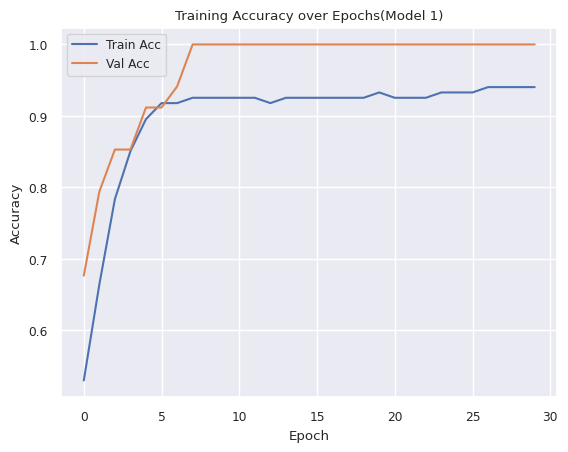

In [67]:
X = df.drop('class', axis = 1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)

y_train = y_train -1

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
class SeedsModel(tf.keras.Model):
    def __init__(self):
        super(SeedsModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(16, activation='relu')
        self.dense2 = tf.keras.layers.Dense(12, activation='relu')
        self.out = tf.keras.layers.Dense(3, activation='softmax')  # categorical

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.out(x)
model = SeedsModel()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

histroy = model.fit(X_train, y_train, epochs=30, batch_size=7, validation_split=0.2)
plt.plot(histroy.history['accuracy'], label='Train Acc')
plt.plot(histroy.history['val_accuracy'], label='Val Acc')
plt.title('Training Accuracy over Epochs(Model 1)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Model 2**

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5060 - loss: 1.0082 - val_accuracy: 0.8235 - val_loss: 0.8540
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7302 - loss: 0.8501 - val_accuracy: 0.8235 - val_loss: 0.6465
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7203 - loss: 0.7202 - val_accuracy: 0.8235 - val_loss: 0.5146
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7499 - loss: 0.6503 - val_accuracy: 0.8824 - val_loss: 0.4345
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7455 - loss: 0.6188 - val_accuracy: 0.8824 - val_loss: 0.3802
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8003 - loss: 0.5396 - val_accuracy: 0.9412 - val_loss: 0.3472
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7991 - loss: 0.5088 - val_accuracy: 0.9706 - val_loss: 0.3157
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8341 - loss: 0.4948 - val_accuracy: 0.9706 - val

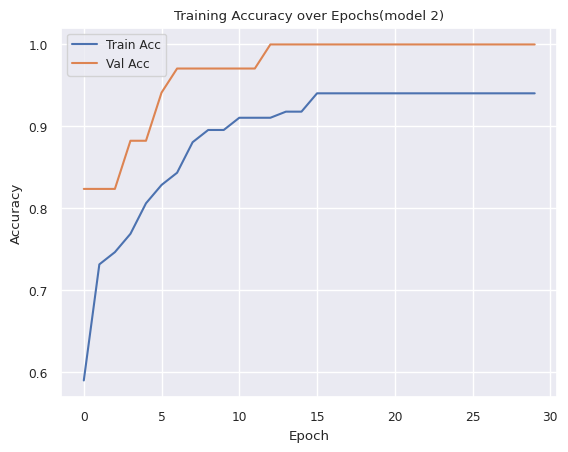

In [68]:
input_layer = Input(shape=(7,))
x = Dense(16, activation='relu')(input_layer)
x = Dense(12, activation='relu')(x)
output_layer = Dense(3, activation='softmax')(x)
model_2 = Model(inputs=input_layer, outputs=output_layer)
model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_2 = model_2.fit(X_train, y_train, epochs=30, batch_size=7, validation_split=0.2)

plt.plot(history_2.history['accuracy'], label='Train Acc')
plt.plot(history_2.history['val_accuracy'], label='Val Acc')
plt.title('Training Accuracy over Epochs(model 2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Model 3**

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4420 - loss: 1.3133 - val_accuracy: 0.3529 - val_loss: 1.1588
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4816 - loss: 1.0976 - val_accuracy: 0.4118 - val_loss: 1.0126
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6223 - loss: 0.9249 - val_accuracy: 0.4706 - val_loss: 0.9017
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6339 - loss: 0.8405 - val_accuracy: 0.4706 - val_loss: 0.8383
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6045 - loss: 0.7972 - val_accuracy: 0.5000 - val_loss: 0.7986
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6681 - loss: 0.7375 - val_accuracy: 0.6765 - val_loss: 0.7612
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6963 - loss: 0.7087 - val_accuracy: 0.7647 - val_loss: 0.7296
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7858 - loss: 0.6447 - val_accuracy: 0.7647 - val_loss

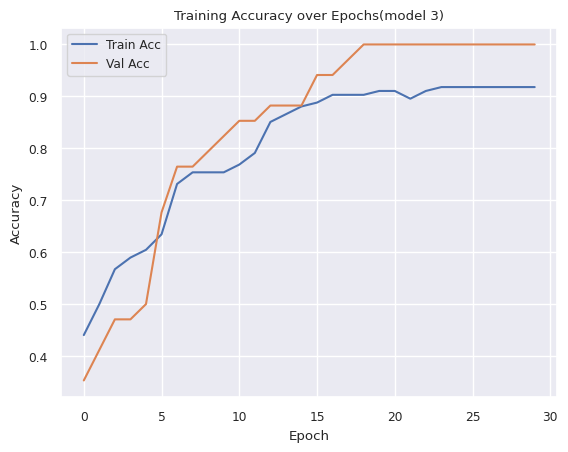

In [69]:
model_3 = Sequential([
    Input(shape=(7,)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

model_3.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_3 = model_3.fit(X_train, y_train, epochs=30, batch_size=7, validation_split=0.2)

plt.plot(history_3.history['accuracy'], label='Train Acc')
plt.plot(history_3.history['val_accuracy'], label='Val Acc')
plt.title('Training Accuracy over Epochs(model 3)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()